In [1]:
from flypy import *
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [ ]:
""" Test code: testing the  fly class
    Make sure this works before executing the rest of the code. Feel free to replace the organization file, 
    fly number, and trial with whatever you want."""


f = fly('data_organization_asym.txt', 7, 'cutwing2')
f.print_statistics()
f.plot_statistics()

In [2]:
data_files = {'asym':'data_organization_asym.txt','sc':'data_organization_sc.txt','epi':'data_organization_epi.txt','halt':'data_organization_halt.txt'}
flies = {'asym':[1,2,3,5,6,7],'sc':[1,2,7,8,9],'epi':[1,2,3,5,7,8,9],'halt':[1,2,3,4,5,8]}
nonhalt_trials = ['cutwing1','cutwing2','cutwing3','cutwing4','cutwing5','intactwings']
halt_trials = ['intacthalteres', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3','removedload']
fly_trials = {'asym' : nonhalt_trials, 'sc' : nonhalt_trials, 'epi': nonhalt_trials, 'halt': halt_trials}
base = os.getcwd()

In [3]:
def find_dir(Mode):
        """ This helper function finds the fly directory, given a certain file. For example, 
            calling this function on 'fly1_asym_cutwing1_1_csv_xyzpts.csv' outputs the path of
            /asymmetric wings/fly1. This function will speed up the next one."""
        for root, Dir, files in os.walk(os.getcwd()):
            for file in files:
                if file == data_files[Mode]:
                    return root
                
                
def iterate_fly(mode, num):
    assert mode in ['asym','epi','halt','sc'] and num in flies[mode]
    base = os.getcwd()
    averr_left, averr_right = [],[]
    maxerr_left, maxerr_right = [],[]
    for trial in fly_trials[mode]:
        try:
            cwd = os.getcwd()
            f = fly(data_files[mode], num, trial); print()
            if cwd == base: 
                print("Changing directories...")
                newdir = find_dir(mode)
                print("New directory:", newdir)
                os.chdir(newdir) # This line here makes the code much much faster. It can run without it, but the code will be slower.

            left_averr, right_averr, left_maxerr, right_maxerr = f.get_errors()
            averr_left.append(left_averr); averr_right.append(right_averr)
            maxerr_left.append(left_maxerr); maxerr_right.append(right_maxerr)
        except Exception as e:
            print(e)
            print('That fly doesn\'t exist'); print()
    os.chdir(base)
    return {'left average error' : averr_left, 'right average error' : averr_right,
           'left maximum error' : maxerr_left, 'right maximum error' : maxerr_right}


In [4]:
error_dict = iterate_fly('asym',7)

You are viewing fly7_cutwing1 in asym mode.

Changing directories...
New directory: C:\Users\sidda\Dropbox\My PC (DESKTOP-5DI2VVI)\Desktop\Summer Project 2020 data\asymmetric wings
A file was found!
fly7_asym_cutwing1_1_csv_xyzpts.csv
Rows: 766

You are viewing fly7_cutwing2 in asym mode.

A file was found!
fly7_asym_cutwing2_1_csv_xyzpts.csv
Rows: 491

You are viewing fly7_cutwing3 in asym mode.

A file was found!
fly7_asym_cutwing3_1_csv_xyzpts.csv
Rows: 543

You are viewing fly7_cutwing4 in asym mode.

A file was found!
fly7_asym_cutwing4_1_csv_xyzpts.csv
Rows: 418

You are viewing fly7_cutwing5 in asym mode.

A file was found!
None
Invalid file path or buffer object type: <class 'NoneType'>
That fly doesn't exist

You are viewing fly7_intactwings in asym mode.

A file was found!
fly7_asym_intactwings_2_csv_xyzpts.csv
Rows: 559



In [ ]:
mode = 'epi' # Change this if you want.
outlist = []
os.chdir(base)
for num in flies[mode]:
    print(fly)
    outlist.append(iterate_fly(mode, num))
    print(os.getcwd())

In [5]:
error_dict # Use this to check whether the first part works
# outlist # Uncomment that part to check if the second part of the code works.

{'left average error': [0.024693495706601672,
  0.02717794467455389,
  0.03373929461067188,
  0.0274353293162156,
  0.03439413065954716],
 'right average error': [0.010627489549717104,
  0.014612188922362277,
  0.0093064057228042,
  0.015823867046742403,
  0.02042238078650277],
 'left maximum error': [0.12268647751207935,
  0.13739707620056713,
  0.13717456572807055,
  0.1372613865739063,
  0.1752381988014723],
 'right maximum error': [0.08572117121626166,
  0.12748724368401446,
  0.15412314742043284,
  0.1298747190167447,
  0.095207674307366]}

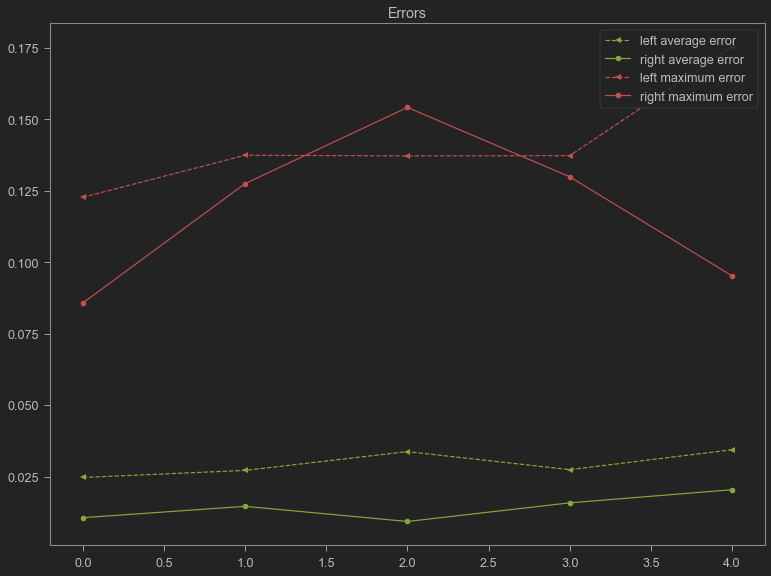

In [6]:
plt.plot(error_dict['left average error'], '--<g', label = 'left average error') 
plt.plot(error_dict['right average error'], '-og', label = 'right average error')
plt.plot(error_dict['left maximum error'], '--<r', label = 'left maximum error') 
plt.plot(error_dict['right maximum error'],'-or', label = 'right maximum error')
plt.title(label = 'Errors')
plt.legend(loc = 'upper right')
plt.show()


In [ ]:
for error_dict in outlist:
    plt.plot(error_dict['left average error'], '--<g', label = 'left average error') 
    plt.plot(error_dict['right average error'], '-og', label = 'right average error')
    plt.plot(error_dict['left maximum error'], '--<r', label = 'left maximum error') 
    plt.plot(error_dict['right maximum error'],'-or', label = 'right maximum error')
    plt.title(label = 'Errors')
    plt.legend(loc = 'upper right')
    plt.show()